In [4]:
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def complex_diferentation(x, function, step): 
    value=[]
    
    applied = map(lambda i:function(complex(i,step)), x)
    value = [v.imag/step for v in applied]
    
    #value = function(complex(x, step)) 
    return value

Рассмотрим функцию y=x^2 

In [9]:
square= lambda x: x*x                  
dev_f = lambda x: x+x              

x=np.linspace(0, 1.5, 101)

y_dev = dev_f(x)
y_comp= complex_diferentation(x,  square,  1e-10)


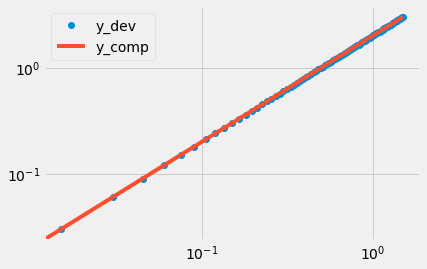

In [10]:
plt.loglog(x, y_dev, 'o', label='y_dev')
plt.loglog(x, y_comp, '-', label='y_comp')
plt.legend(loc='best')

Рассмотрим функцию y=e^(2*x)


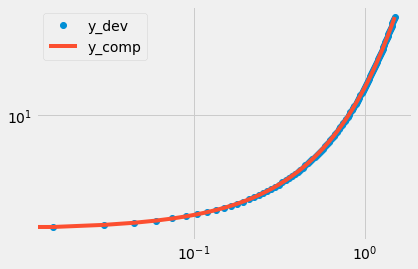

In [20]:
from cmath import exp                      
newf = lambda x: exp(2*x)

xnew = np.linspace(0, 1.5, 101) 


y_comp1= complex_diferentation(xnew, newf, 1)
xnew = np.linspace(0, 1.5, 101) 
y_dev1 = 2.0 * np.exp(2.0*xnew)  
y_comp1= complex_diferentation(xnew, newf, 1/100) 


plt.loglog(xnew, y_dev1, 'o', label='y_dev')
plt.loglog(xnew, y_comp1, '-', label='y_comp')
plt.legend(loc='best')

In [21]:
def sumofabserror(x1, y1): #функция для вычисления ошибки, 
    #подаем два аргумента - массивы из значений, полученные с помощью дифференцирования с комплексным шагом и по формуле, известной заранее 
    s=0
    for i in range(len(x1)):
        s=s+abs(x1[i]-y1[i])
    return s


def sumofabserror(x1, y1): #функция для вычисления ошибки, 
    #подаем два аргумента - массивы из значений, полученные с помощью дифференцирования с комплексным шагом и по формуле, известной заранее 
    x1 = np.array(x1)
    y1 = np.array(y1)
    res = sum(np.abs(x1-y1))
    return res

Рассмотрим на примере функции y=e^(2*x) в точке х=1


In [83]:
epsilons = []




epsilons = np.arange(150)*0.1 + 0.01

In [74]:

ys=[]
y_dev1 = 2.0*np.exp(2*1)  
for e in epsilons:
    yx1=complex_diferentation([1], newf, e)
    ys.append(sumofabserror(y_dev1, yx1))
    


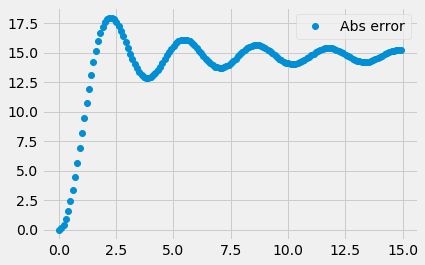

In [75]:
plt.plot(epsilons, ys, 'o', label='Abs error')

plt.legend(loc='best')

Рассмотрим значения ошибки для разных значений шага. Шаг принимает значения от 0.01 до 14.91.
Как мы видим по графику, значение функции ошибки (для одной точки) колеблется, постепенно уменьшая амплитуду. 
Значение функции сходится к ~14.778117042971163

При уменьшении шага значение функции ошибки уменьшается и близко к нулю


#к заданию 2 
Рассмотрим негладкую функцию y=abs(x) 


In [84]:

yabs=lambda x: abs(x)
def div_abs(x):
    arrays=[]
    for i in x:
        arrays.append(i/abs(i))

    return arrays
    

In [85]:

x_new = list(range(-20, 0)) + list(range(1,21))
    
    
y_dev3 = div_abs(x_new) 
y_comp3= complex_diferentation(x_new, yabs, 1e-2)


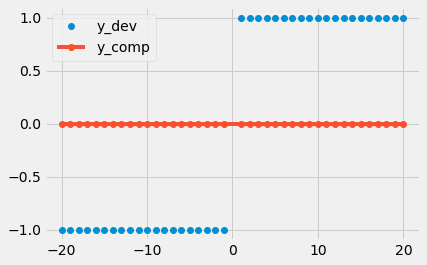

In [86]:
plt.plot(x_new, y_dev3, 'o', label='y_dev')
plt.plot(x_new, y_comp3, 'o-', label='y_comp')
plt.legend(loc='best')


Дифференцирование с комплексным шагом не помогло для дифференцирования этой функции 
